<a href="https://colab.research.google.com/github/hemptastic-2020/AIML/blob/master/ML_LAB_3_SPANDAN_PAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_curve

In [2]:
from google.colab import files
uploaded = files.upload()

Saving samples_cancer.csv to samples_cancer.csv


In [3]:
df=pd.read_csv("samples_cancer.csv",delimiter=",")

In [ ]:
#Important Note:
#There is '?' value in some cells of the BareNuc column in the dataset. We need to replacce the '?' with  
#average numerical value in that column, otherwise we cannot use SVM model on the dataset.

In [4]:
bnsum=0 #Sum of numerical values in the BareNuc column
numlen=0 #Count of numerical values in the BareNuc column

for i in df['BareNuc']:
    if i!='?':
        bnsum+=int(i)
        numlen+=1
        
        
avgval=bnsum//numlen #Average of all numerical values in the BareNuc column

In [5]:
print(avgval)

3


In [7]:
df['BareNuc']=df['BareNuc'].replace('?',str(avgval)) #Replace '?' with avgval in BareNuc column

In [8]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [10]:
df.shape

(699, 11)

In [11]:
df.drop('ID',axis=1,inplace=True) #ID is not required, hence removing the column

In [12]:
df.head() #After removing ID

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [13]:
target_count = df.Class.value_counts()
print('Benign:', target_count[2])
print('Malignant:', target_count[4])

Benign: 458
Malignant: 241


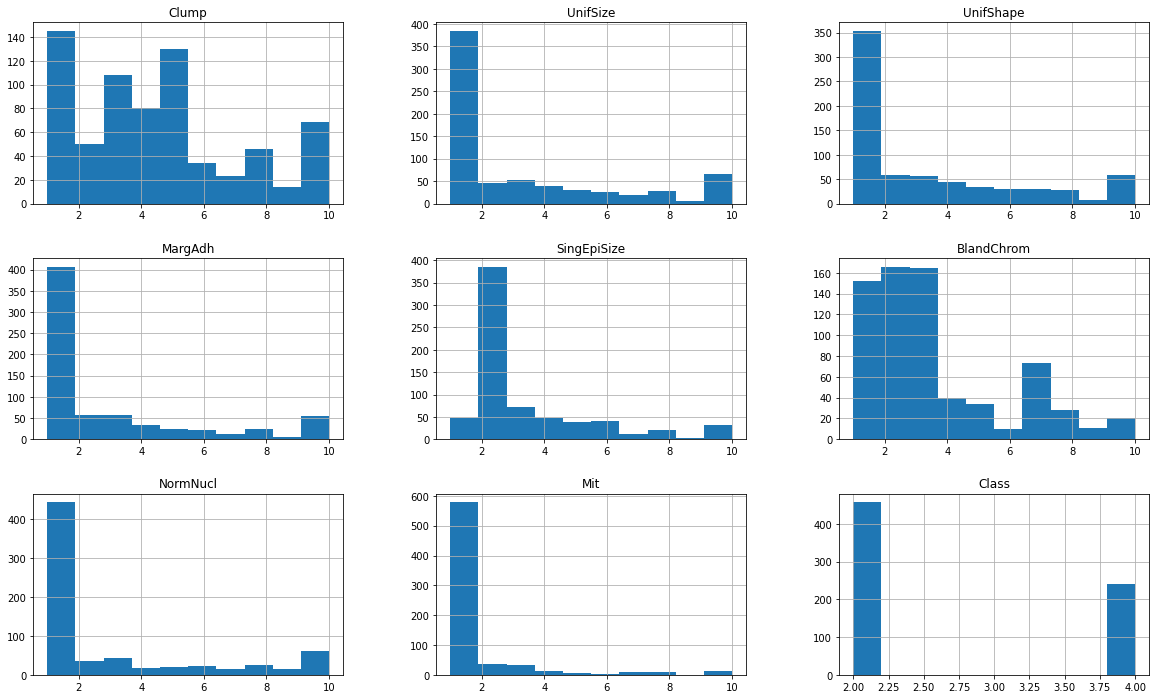

In [14]:
df.hist(figsize=(20,12))
plt.show()

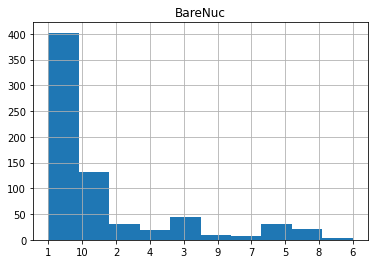

In [15]:
df['BareNuc'].hist()
plt.title('BareNuc')
plt.show()

In [16]:
feature_df=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x=np.asarray(feature_df)
y=np.asarray(df['Class'])

In [17]:
x[0:5]

array([[5, 1, 1, 1, 2, '1', 3, 1, 1],
       [5, 4, 4, 5, 7, '10', 3, 2, 1],
       [3, 1, 1, 1, 2, '2', 3, 1, 1],
       [6, 8, 8, 1, 3, '4', 3, 7, 1],
       [4, 1, 1, 3, 2, '1', 3, 1, 1]], dtype=object)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [19]:
x_train.shape

(559, 9)

In [ ]:
# LINEAR KERNEL SVM

In [20]:
classifier_svm=svm.SVC(kernel='linear',gamma='auto',C=1,probability=True)

In [21]:
classifier_svm.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
y_predict=classifier_svm.predict(x_test)

In [23]:
c_svm=confusion_matrix(y_test,y_predict)

In [25]:
print('Confusion matrix for linear kernel SVM:\n',c_svm)

Confusion matrix for linear kernel SVM:
 [[87  1]
 [ 2 50]]


In [26]:
Accuracy_svm=sum(np.diag(c_svm))/(np.sum(c_svm))

In [27]:
print('Accuracy of our linear kernel SVM: ', Accuracy_svm*100, '%')

Accuracy of our linear kernel SVM:  97.85714285714285 %


In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98        88
           4       0.98      0.96      0.97        52

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [29]:
jaccard_score(y_test, y_predict,pos_label=4)

0.9433962264150944

In [ ]:
# POLYNOMIAL KERNEL SVM

In [30]:
classifier_svmk=svm.SVC(kernel='poly',gamma='auto',C=1,probability=True)

In [31]:
classifier_svmk.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
y_predict=classifier_svmk.predict(x_test)

In [34]:
c_svmk=confusion_matrix(y_test,y_predict)

In [35]:
print('Confusion matrix for polynomial kernel SVM:\n',c_svmk)

Confusion matrix for polynomial kernel SVM:
 [[88  0]
 [ 9 43]]


In [36]:
Accuracy_svmk=sum(np.diag(c_svmk))/(np.sum(c_svmk))

In [37]:
print('Accuracy of our linear kernel SVM: ', Accuracy_svmk*100, '%')

Accuracy of our linear kernel SVM:  93.57142857142857 %


In [38]:
jaccard_score(y_test, y_predict,pos_label=4)

0.8269230769230769

In [ ]:
# RBF KERNEL SVM

In [39]:
classifier_svmrbf=svm.SVC(kernel='rbf',gamma='auto',C=1,probability=True)

In [40]:
classifier_svmrbf.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
y_predict=classifier_svmrbf.predict(x_test)

In [43]:
c_svmrbf=confusion_matrix(y_test,y_predict)

In [44]:
print('Confusion matrix for RBF kernel SVM:\n',c_svmrbf)

Confusion matrix for RBF kernel SVM:
 [[83  5]
 [ 1 51]]


In [62]:
Accuracy_svmrbf=sum(np.diag(c_svmrbf))/(np.sum(c_svmrbf))

In [63]:
print('Accuracy of our linear kernel SVM: ', Accuracy_svmrbf*100, '%')

Accuracy of our linear kernel SVM:  95.71428571428572 %


In [64]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.49      0.56      0.52        88
           4       0.00      0.00      0.00        52

    accuracy                           0.35       140
   macro avg       0.24      0.28      0.26       140
weighted avg       0.30      0.35      0.33       140



In [ ]:
jaccard_score(y_test, y_predict,pos_label=4)

0.8947368421052632

In [ ]:
#SIGMOID KERNEL SVM

In [45]:
classifier_svmsig=svm.SVC(kernel='sigmoid',gamma='auto',C=1,probability=True)

In [46]:
classifier_svmsig.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [47]:
y_predict=classifier_svmsig.predict(x_test)

In [48]:
c_svmsig=confusion_matrix(y_test,y_predict)

In [49]:
print('Confusion matrix for sigmoid kernel SVM:\n',c_svmsig)

Confusion matrix for sigmoid kernel SVM:
 [[49 39]
 [52  0]]


In [50]:
Accuracy_svmsig=sum(np.diag(c_svmsig))/(np.sum(c_svmsig))

In [51]:
print('Accuracy of our linear kernel SVM: ', Accuracy_svmsig*100, '%')

Accuracy of our linear kernel SVM:  35.0 %


In [52]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.49      0.56      0.52        88
           4       0.00      0.00      0.00        52

    accuracy                           0.35       140
   macro avg       0.24      0.28      0.26       140
weighted avg       0.30      0.35      0.33       140



In [53]:
jaccard_score(y_test, y_predict,pos_label=4)

0.0

In [54]:
#ROC curves for all the SVM Models indivisually in four graphs

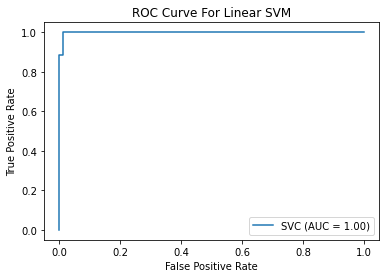

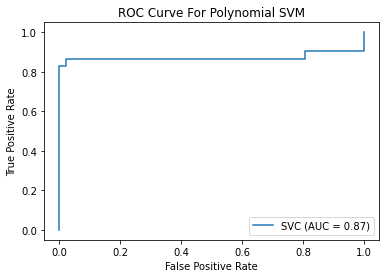

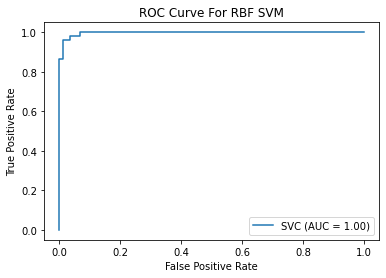

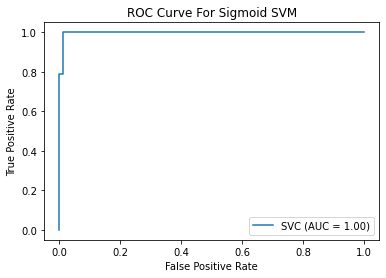

In [ ]:
metrics.plot_roc_curve(classifier_svm, x_test, y_test) #ROC Curve For Linear Kernel SVM
plt.title('ROC Curve For Linear SVM')
plt.show()
metrics.plot_roc_curve(classifier_svmk, x_test, y_test) #ROC Curve For Polynomial Kernel SVM
plt.title('ROC Curve For Polynomial SVM')
plt.show()
metrics.plot_roc_curve(classifier_svmrbf, x_test, y_test) #ROC Curve For RBF Kernel SVM
plt.title('ROC Curve For RBF SVM')
plt.show()
metrics.plot_roc_curve(classifier_svmsig, x_test, y_test) #ROC Curve For Sigmoid Kernel SVM
plt.title('ROC Curve For Sigmoid SVM')
plt.show()

In [55]:
#ROC curves for all the SVM Models together in one graph

In [56]:
y_pred_prob1 = classifier_svm.predict_proba(x_test)[:,1] #ROC Curve For Linear Kernel SVM
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1,pos_label=4)

In [57]:
y_pred_prob2 = classifier_svmk.predict_proba(x_test)[:,1] #ROC Curve For Polynomial Kernel SVM
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2,pos_label=4)

In [58]:
y_pred_prob3 = classifier_svmrbf.predict_proba(x_test)[:,1] #ROC Curve For RBF Kernel SVM
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3,pos_label=4)

In [59]:
y_pred_prob4 = classifier_svmsig.predict_proba(x_test)[:,1] #ROC Curve For Sigmoid Kernel SVM
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4,pos_label=4)

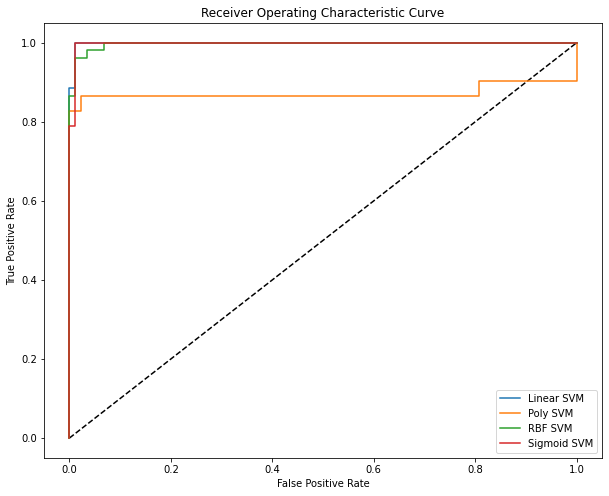

In [60]:
#Plotting all four curves in one graph
fig=plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Linear SVM")
plt.plot(fpr2, tpr2, label= "Poly SVM ")
plt.plot(fpr3, tpr3, label= "RBF SVM ")
plt.plot(fpr4, tpr4, label= "Sigmoid SVM")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic Curve')
plt.show()

#fig.savefig('ROC Curve All In One.png') #Uncomment this if you want to save the picture

In [ ]:
#Error rates

In [65]:
print('Error rate of Linear Kernel SVM = ', (1.0-Accuracy_svm)*100,'%')

print('Error rate of Polynomial Kernel SVM = ', (1.0-Accuracy_svmk)*100,'%')

print('Error rate of RBF Kernel SVM = ', (1.0-Accuracy_svmrbf)*100,'%')

print('Error rate of Sigmoid Kernel SVM = ', (1.0-Accuracy_svmsig)*100,'%')

Error rate of Linear Kernel SVM =  2.1428571428571463 %
Error rate of Polynomial Kernel SVM =  6.428571428571428 %
Error rate of RBF Kernel SVM =  4.285714285714281 %
Error rate of Sigmoid Kernel SVM =  65.0 %
